0.83083


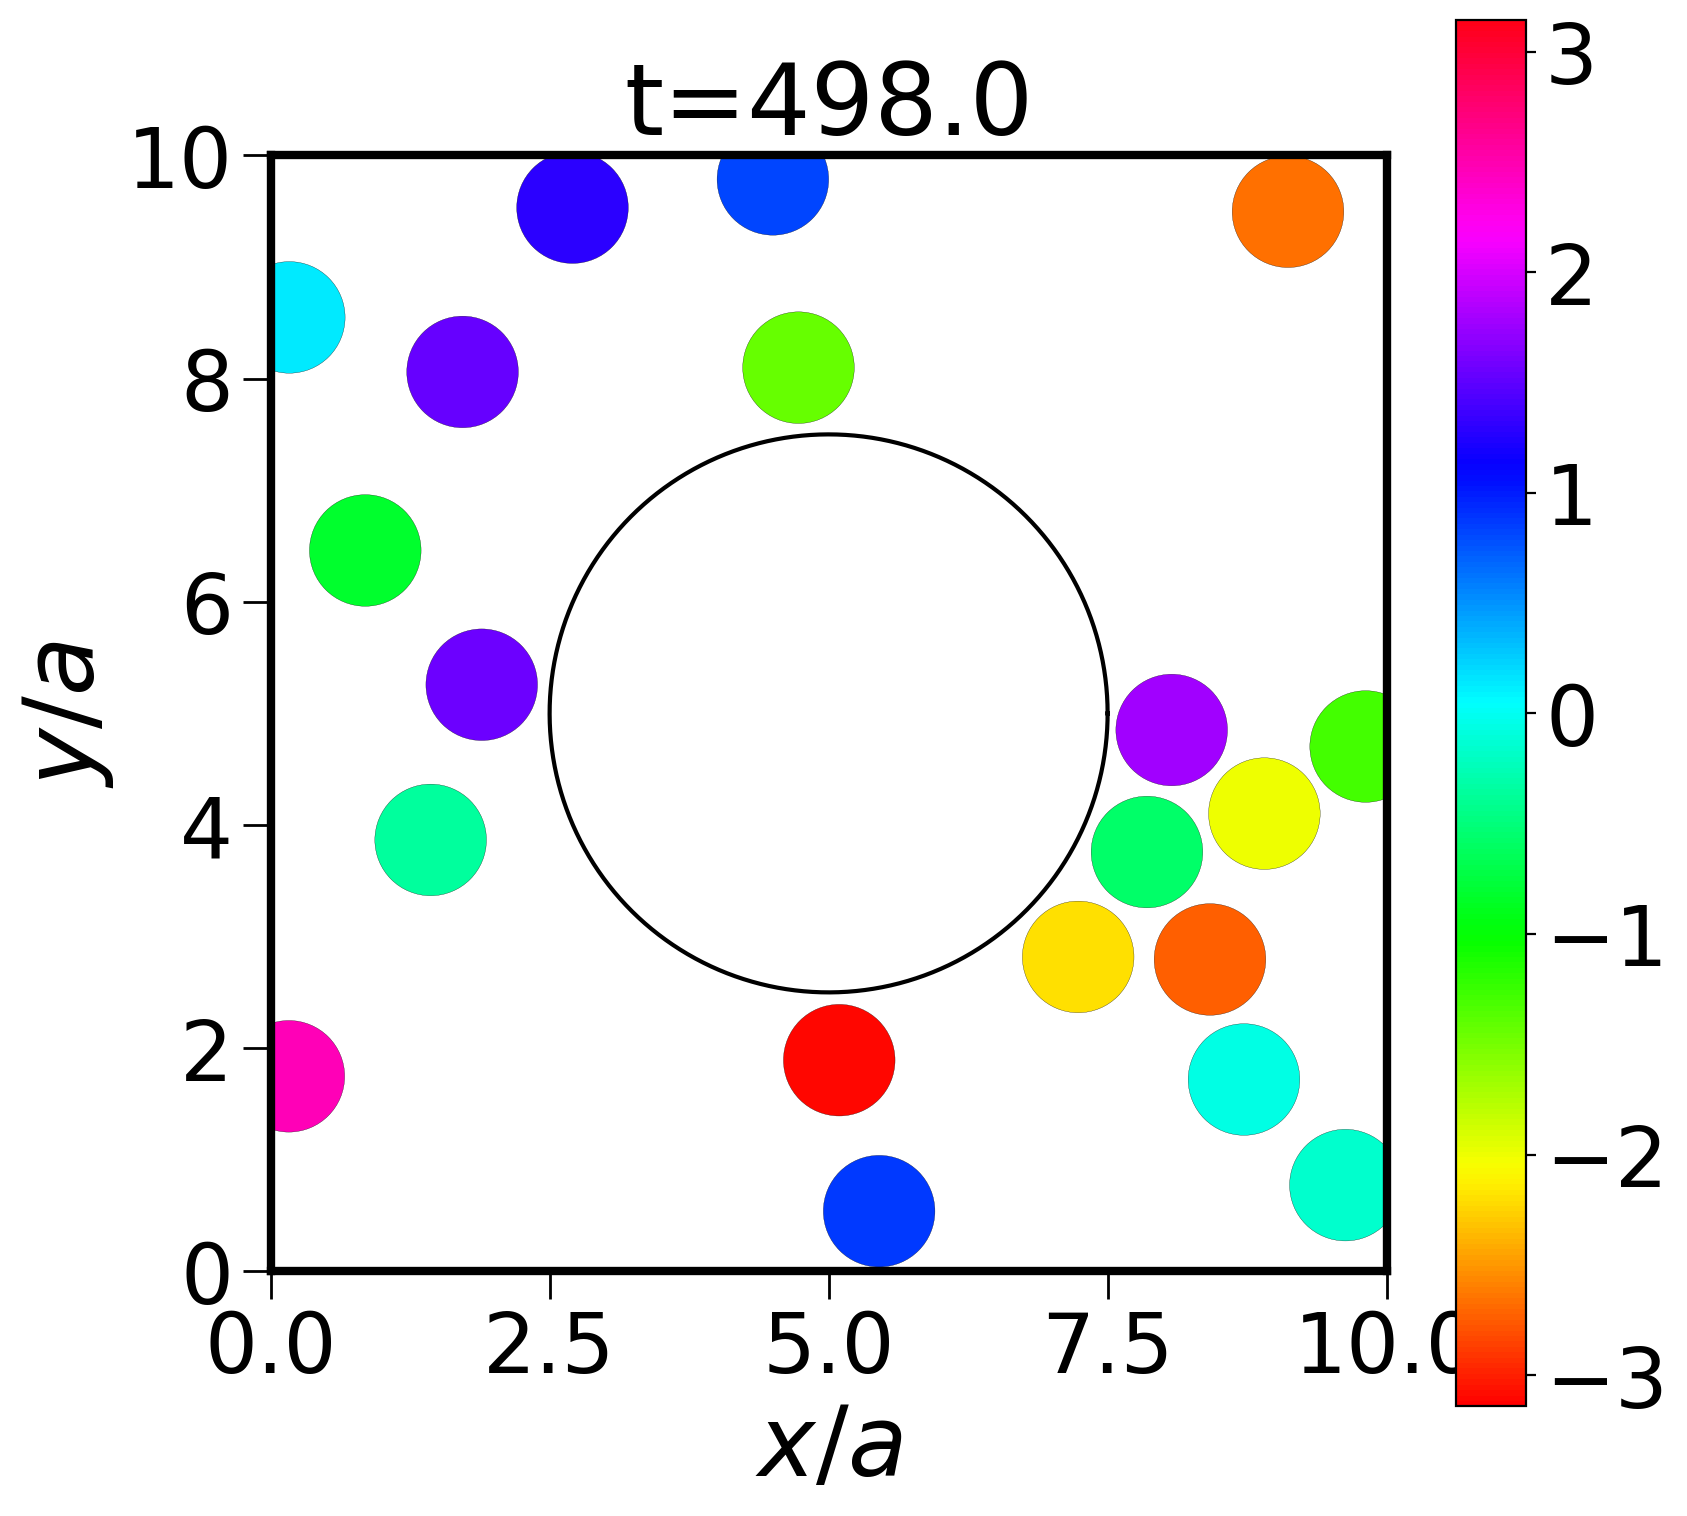

In [5]:
%matplotlib inline
import math
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm  # colormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
plt.rcParams["text.usetex"] =False
plt.rcParams["font.size"] = 30
#from matplotlib import patches
from matplotlib.collections import EllipseCollection
from matplotlib.collections import PatchCollection

cmap = matplotlib.colormaps["Greys"]
# Np=12800#8192#2048#
def circleplot(R,L):
    t = np.linspace(0,np.pi*2,1000)
    x = R * np.cos(t)+L/2
    y = R * np.sin(t)+L/2
    plt.plot(x,y,"-",color="k",markersize=20)
  
def make_animation(moji,moji2,lo,L,tau,v0,Ms,filenum,vminmax,fname,vminmax2,Mg):
    fig = plt.figure(figsize=(9,9))
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    title=plt.title("t")
    if make_w==0 or make_w==2:
        #cbのために適当なマップをダス:;
        # Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも?);
        # アニメーション内部でプロットしたい場合は(update_normal(mappable)？使う前に検討);
        x, y,vx ,vy= np.loadtxt("./{}_animelo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/tyouwaenn_lo{:.3f}_tau{:.3f}_m{:.3f}_t{:n}.dat".format(moji,lo,Ms,tau,v0,lo,tau,Mg,0), comments='#', unpack=True)
        a= np.loadtxt("./{}_animelo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/tyokkei.dat".format(moji,lo,Ms,tau,v0), comments='#', unpack=True)
        vminma=np.amax(np.abs(vx))
        print(vminma)
        '''xpast0=[]
        ypast0=[]
        xpast1=[]
        ypast1=[]
        line,=plt.plot(x,y,"-",markersize=5,color="g",alpha=0.5)
        line1,=plt.plot(x,y,"-",markersize=5,color="y",alpha=0.5)'''
        # vminmax=2
        th=np.zeros_like(x)
        p = EllipseCollection(a[1:],a[1:],th,units="xy", cmap=matplotlib.cm.hsv,transOffset=ax.transData,animated=True, alpha=1.0,fc='g',ec="k",lw=0.1,offsets=(np.c_[x,y]))
        p.set_clim(vmin=-np.pi, vmax=np.pi) 
        #animated=true?
        ax.add_collection(p)
        p.set_array(np.arctan2(vy,vx))
        plt.xlim(0,L)
        plt.ylim(0, L)
        if w_lim==1:
            plt.xlim(lim_min,lim_max)
            plt.ylim(lim_min, lim_max)
        plt.colorbar(p)
        circleplot(R,L)
        # p.set_array(lz)
        # C=plt.colorbar(p,label=r"$v_{x}$")

        #カラーバーの上下端を明確に操作したければこっち
        #速さは不明
        """
        from matplotlib.colors import Normalize
        from matplotlib.cm import  ScalarMappable
        norm = Normalize(vmin=-vminmax, vmax=vminmax)
        mappable = ScalarMappable(cmap=cm.bwr, norm=norm)
        C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")
        mappable._A = []
        """
            

        ax.spines['top'].set_linewidth(3)
        ax.spines['bottom'].set_linewidth(3)
        ax.spines['left'].set_linewidth(3)
        ax.spines['right'].set_linewidth(3)
        plt.tick_params(which='major',width = 1, length = 10)
        plt.tick_params(which='minor',width = 1, length = 5)
        plt.xlabel(r"$x/a$",color='k', size=35)
        plt.ylabel(r"$y/a$",color='k', size=35)
        def init():
            """
            何もしない関数。Funkanimationのinitfunkに何も指定しないとupdate_animのj＝0を2回繰り返される.
            本来は軸設定をするところ;
            """
            pass
        def update_anim(j):
            """アニメーションのための関数。引数を増やしたい場合はFunkanimationでfargs=()とする;

            Args:
                j (int): Funkanimationで渡される引数。0からfilemax;

            Returns:
                mappable: 時刻jでのマップ;
            """
            x, y,vx ,vy= np.loadtxt("./{}_animelo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/tyouwaenn_lo{:.3f}_tau{:.3f}_m{:.3f}_t{:n}.dat".format(moji,lo,Ms,tau,v0,lo,tau,Mg,j), comments='#', unpack=True)
            # lz=(x*vy-y*vx)/np.sqrt(x*x+y*y)
            '''    xpast0.append(x[0])
            ypast0.append(y[0])
            # tmin=np.max([0,j-100])
            line.set_data(xpast0[:j+1],ypast0[:j+1])
            xpast1.append(x[1])
            ypast1.append(y[1])
            line1.set_data(xpast1[:j+1],ypast1[:j+1])'''
            p.set_offsets(np.c_[x,y])
            
            p.set_array(np.arctan2(vy,vx))
            title.set_text("t={:.1f}".format(j*a[0]))#plt.titleでもなぜか上手くいくことがある.
            return [p]



        ani = FuncAnimation(fig, update_anim,init_func=init(), interval=100, blit=True, frames = filenum)
        ani.save("./{}/{}lo{}tau{}Ms{}v0{}colmax{}minmax{}0.mp4".format(fname,moji,lo,tau,Ms,v0,vminmax,vminma),writer="ffmpeg")
        plt.show()
    if make_w==1 or make_w==2:    
        fig = plt.figure(figsize=(6,6))
        ax = fig.add_subplot(1,1,1)
        title=plt.title("t")
        plt.xlim(lim_min,lim_max)
        plt.ylim(lim_min, lim_max)
        #cbのために適当なマップをダス:;
        # Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも?);
        # アニメーション内部でプロットしたい場合は(update_normal(mappable)？使う前に検討);
        vol = np.loadtxt("../{}/{}_animelo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/vol_lo{:.3f}_v0{:.1f}_tau{:.3f}_m{:.3f}_t{:n}.dat".format(moji2,moji,lo,Ms,tau,v0,lo,v0,tau,Mg,0), comments='#', unpack=False)
        # lz=(x*vy-y*vx)/np.sqrt(x*x+y*y)
        bituzu=0.25
        x=np.arange(0,100,bituzu)
        y=np.arange(0,100,bituzu)
        X, Y = np.meshgrid(x, y)
        p=plt.pcolormesh(X,Y,vol,cmap=cm.RdYlBu_r,shading='nearest')
        # plt.colorbar(co)
        p.set_clim(vmin=-vminmax2, vmax=vminmax2) 

        #カラーバーの上下端を明確に操作したければこっち
        #速さは不明
        """
        from matplotlib.colors import Normalize
        from matplotlib.cm import  ScalarMappable
        norm = Normalize(vmin=-vminmax, vmax=vminmax)
        mappable = ScalarMappable(cmap=cm.bwr, norm=norm)
        C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")
        mappable._A = []
        """
            

        ax.spines['top'].set_linewidth(3)
        ax.spines['bottom'].set_linewidth(3)
        ax.spines['left'].set_linewidth(3)
        ax.spines['right'].set_linewidth(3)
        plt.tick_params(which='major',width = 1, length = 10)
        plt.tick_params(which='minor',width = 1, length = 5)
        plt.xlabel(r"$x/a$",color='k', size=35)
        plt.ylabel(r"$y/a$",color='k', size=35)

        def update_anim2(j):
            """アニメーションのための関数。引数を増やしたい場合はFunkanimationでfargs=()とする;

            Args:
                j (int): Funkanimationで渡される引数。0からfilemax;

            Returns:
                mappable: 時刻jでのマップ;
            """
            vx = np.loadtxt("../{}/{}_animelo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/vol_lo{:.3f}_v0{:.1f}_tau{:.3f}_m{:.3f}_t{:n}.dat".format(moji2,moji,lo,Ms,tau,v0,lo,v0,tau,Mg,j), comments='#', unpack=False)
            p.set_array(vx.ravel())
            title.set_text("t={:.1f}".format(j*a[0]))#plt.titleでもなぜか上手くいくことがある.
            return [p]



        ani = FuncAnimation(fig, update_anim2,init_func=init(), interval=100, blit=True, frames = filenum)
        ani.save("./{}/vol{}lo{}tau{}Ms{}v0{}colmax{}minmax{}.mp4".format(fname,moji,lo,tau,Ms,v0,vminmax2,vminmax),writer="ffmpeg")
        plt.show()
        

moji="Iapr2n2e16pir1_24"#粒子のfoldername.
moji2="pirror"#folder name.
lo=0.2
R=2.5
L=10
Np=lo*4/np.pi*(L*L-np.pi*2*R*R)
tau=50
v0=1
Ms=0.5
min=0#minを有限にする機能はまだ;
max=250
filenum=max-min
vminmax=0.1
vminmax2=0.15
fname="tpirr"
make_w=0#0なら粒子だけ1なら渦だけ、2なら両方;#
lim_min=0
lim_max=200
w_lim=0#1なら粒子マップを制限suru#
from os import makedirs
makedirs('{}'.format(fname), exist_ok=True)
# for i in range(len(Ms)):
make_animation(moji,moji2,lo,L,tau,v0,Ms,filenum,vminmax,fname,vminmax2,0)
#保存

